In [ ]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [ ]:
series = pd. Series()
print(series)

Series([], dtype: object)


###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [ ]:
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 9])

add = s1 + s2
sub = s1 - s2
mul = s1 * s2
div = s1 / s2
print("Addition:\n", add)
print("Subtraction:\n", sub)
print("Multiplication:\n", mul)
print("Division:\n", div)

Addition:
 0     3
1     7
2    11
3    15
4    19
dtype: int64
Subtraction:
 0    1
1    1
2    1
3    1
4    1
dtype: int64
Multiplication:
 0     2
1    12
2    30
3    56
4    90
dtype: int64
Division:
 0    2.000000
1    1.333333
2    1.200000
3    1.142857
4    1.111111
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [ ]:
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])
equal = s1 == s2
greater_than = s1 > s2
less_than = s1 < s2
print("Equal:\n", equal)
print("Greater Than:\n", greater_than)
print("Less Than:\n", less_than)

Equal:
 0    False
1    False
2    False
3    False
4     True
dtype: bool
Greater Than:
 0     True
1     True
2     True
3     True
4    False
dtype: bool
Less Than:
 0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [ ]:
series = pd.Series([1,2,'Python', 2.0, True, 100])
series = pd.to_numeric(series, errors='coerce')
print(series)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [12]:
data = pd.read_csv('/content/batsman_runs_series.csv')
data.head()
data = data.sort_values('batsman_run', ascending=False)
data.head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


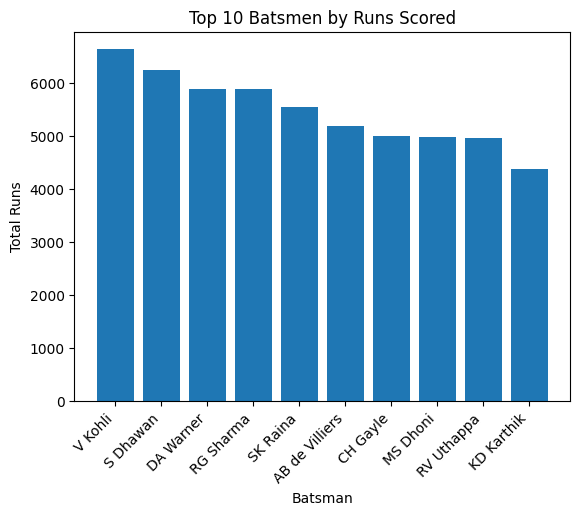

In [10]:
# @title Top 10 Batsmen

import matplotlib.pyplot as plt

top_10 = data.sort_values('batsman_run', ascending=False).head(10)

plt.bar(top_10['batter'], top_10['batsman_run'])
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Batsmen by Runs Scored')
_ = plt.xticks(rotation=45, ha='right')

###`Q-7` No of players having runs above 3000

In [17]:
data[data['batsman_run'] > 3000].value_counts().count()

20

###`Q-8` No of players having runs above mean value?

In [18]:
data[data['batsman_run'] > data['batsman_run'].mean()].value_counts().count()

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [56]:
data = pd.read_csv('/content/items.csv', index_col='item_name')
data.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98


In [57]:
data.isna().sum()

,0
item_price,50


In [58]:
data['item_price'] = data['item_price'].astype(str)
data['item_price'] = data['item_price'].str.replace('[\$, ]', '', regex=True).astype(float)
conversion_rate = 80.0
data['item_price_in_rupees'] = data['item_price'] * conversion_rate
data.head()

,item_price,item_price_in_rupees
item_name,,
Chips and Fresh Tomato Salsa,2.39,191.2
Izze,3.39,271.2
Nantucket Nectar,3.39,271.2
Chips and Tomatillo-Green Chili Salsa,2.39,191.2
Chicken Bowl,16.98,1358.4


In [59]:
mean = data['item_price_in_rupees'].mean()
data['item_price_in_rupees'].fillna(mean, inplace=True)
data
# isna = data['item_price_in_rupees'].isna().sum()
# print(isna)

,item_price,item_price_in_rupees
item_name,,
Chips and Fresh Tomato Salsa,2.39,191.2
Izze,3.39,271.2
Nantucket Nectar,3.39,271.2
Chips and Tomatillo-Green Chili Salsa,2.39,191.2
Chicken Bowl,16.98,1358.4
...,...,...
Steak Burrito,11.75,940.0
Steak Burrito,11.75,940.0
Chicken Salad Bowl,11.25,900.0


###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



597.0425196850393
356.0
700.0
[[<Axes: title={'center': 'item_price_in_rupees'}>]]
17


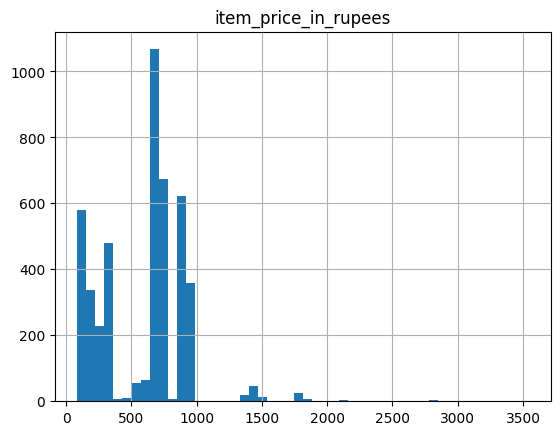

In [61]:
mean = data['item_price_in_rupees'].mean()
print(mean)
percentile_30 = data['item_price_in_rupees'].quantile(0.3)
print(percentile_30)
percentile_6 = data['item_price_in_rupees'].quantile(0.6)
print(percentile_6)

plot = pd.DataFrame(data['item_price_in_rupees']).hist(bins=50)
print(plot)

count = data[(data['item_price_in_rupees'] >= 1000) & (data['item_price_in_rupees'] <= 2000)].value_counts().count()
print(count)